In [1]:
# Import needed libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import joblib 

from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression,Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor 
from sklearn import neighbors
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_curve, plot_roc_curve, mean_absolute_error, mean_squared_error, f1_score
from sklearn.model_selection import GridSearchCV

%matplotlib inline  
sns.set(rc={'figure.figsize': [14, 7]}, font_scale=1.2)





#Read Data 
[2 data sets ]

In [2]:
df1=pd.read_csv('Hourly energy demand generation and weather\energy_dataset00.csv',sep=';')
df1.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17,NaN,6436,26118,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16,NaN,5856,24934,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8,NaN,5454,23515,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2,NaN,5151,22642,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9,NaN,4861,21785,20264.0,38.41,56.04


In [3]:
df2=pd.read_csv('Hourly energy demand generation and weather\weather_features.csv')
df2.head()

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-01 01:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2015-01-01 02:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
3,2015-01-01 03:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2015-01-01 04:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n



### drop un un usefule colums


In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178396 entries, 0 to 178395
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dt_iso               178396 non-null  object 
 1   city_name            178396 non-null  object 
 2   temp                 178396 non-null  float64
 3   temp_min             178396 non-null  float64
 4   temp_max             178396 non-null  float64
 5   pressure             178396 non-null  int64  
 6   humidity             178396 non-null  int64  
 7   wind_speed           178396 non-null  int64  
 8   wind_deg             178396 non-null  int64  
 9   rain_1h              178396 non-null  float64
 10  rain_3h              178396 non-null  float64
 11  snow_3h              178396 non-null  float64
 12  clouds_all           178396 non-null  int64  
 13  weather_id           178396 non-null  int64  
 14  weather_main         178396 non-null  object 
 15  weather_descripti

In [5]:
df2.drop(df2.index[35064:],inplace=True)

In [6]:
df2.drop(columns=['weather_id','temp_min','city_name','weather_description','weather_icon','wind_deg','temp_max'],inplace=True)

In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35064 entries, 0 to 35063
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   dt_iso        35064 non-null  object 
 1   temp          35064 non-null  float64
 2   pressure      35064 non-null  int64  
 3   humidity      35064 non-null  int64  
 4   wind_speed    35064 non-null  int64  
 5   rain_1h       35064 non-null  float64
 6   rain_3h       35064 non-null  float64
 7   snow_3h       35064 non-null  float64
 8   clouds_all    35064 non-null  int64  
 9   weather_main  35064 non-null  object 
dtypes: float64(4), int64(4), object(2)
memory usage: 2.9+ MB


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35033 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil coal-derived gas           34614 non-null  float64
 4   generation fossil gas                        34588 non-null  float64
 5   generation fossil hard coal                  34588 non-null  float64
 6   generation fossil oil                        35019 non-null  float64
 7   generation fossil oil shale                  35020 non-null  float64
 8   generation fossil peat                       35020 non-null  float64
 9   generation geothermal                        35020 non-null  float64
 10

In [9]:
df1.drop(columns=['generation hydro pumped storage aggregated','forecast solar day ahead','forecast wind offshore eday ahead',\
'forecast wind onshore day ahead','generation fossil coal-derived gas','generation fossil oil shale',\
'generation fossil peat','generation geothermal','generation marine','generation wind offshore'],inplace=True)

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 19 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35033 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil gas                        34588 non-null  float64
 4   generation fossil hard coal                  34588 non-null  float64
 5   generation fossil oil                        35019 non-null  float64
 6   generation hydro pumped storage consumption  35019 non-null  float64
 7   generation hydro run-of-river and poundage   35019 non-null  float64
 8   generation hydro water reservoir             35020 non-null  float64
 9   generation nuclear                           35047 non-null  float64
 10

##Merge Data and explore it 
### Feature Engineering 

### work on data colum to get season , day or night 

In [11]:
df=pd.merge(df1,df2,how='inner',left_on='time',right_on='dt_iso')
pd.set_option('display.max_columns', None)
df.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,total load forecast,total load actual,price day ahead,price actual,dt_iso,temp,pressure,humidity,wind_speed,rain_1h,rain_3h,snow_3h,clouds_all,weather_main
0,2015-01-01 00:00:00+01:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,26118,25385.0,50.10,65.41,2015-01-01 00:00:00+01:00,270.475,1001,77,1,0.0,0.0,0.0,0,clear
1,2015-01-01 01:00:00+01:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,24934,24382.0,48.10,64.92,2015-01-01 01:00:00+01:00,270.475,1001,77,1,0.0,0.0,0.0,0,clear
2,2015-01-01 02:00:00+01:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,73.0,50.0,196.0,5461.0,23515,22734.0,47.33,64.48,2015-01-01 02:00:00+01:00,269.686,1002,78,0,0.0,0.0,0.0,0,clear
3,2015-01-01 03:00:00+01:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,75.0,50.0,191.0,5238.0,22642,21286.0,42.27,59.32,2015-01-01 03:00:00+01:00,269.686,1002,78,0,0.0,0.0,0.0,0,clear
4,2015-01-01 04:00:00+01:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,74.0,42.0,189.0,4935.0,21785,20264.0,38.41,56.04,2015-01-01 04:00:00+01:00,269.686,1002,78,0,0.0,0.0,0.0,0,clear


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35064 entries, 0 to 35063
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35033 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil gas                        34588 non-null  float64
 4   generation fossil hard coal                  34588 non-null  float64
 5   generation fossil oil                        35019 non-null  float64
 6   generation hydro pumped storage consumption  35019 non-null  float64
 7   generation hydro run-of-river and poundage   35019 non-null  float64
 8   generation hydro water reservoir             35020 non-null  float64
 9   generation nuclear                           35047 non-null  float64
 10

In [13]:
df.describe()

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,total load forecast,total load actual,price day ahead,price actual,temp,pressure,humidity,wind_speed,rain_1h,rain_3h,snow_3h,clouds_all
count,35033.000000,35046.000000,34588.000000,34588.000000,35019.000000,35019.000000,35019.000000,35020.000000,35047.000000,35046.000000,35046.000000,35046.000000,35045.000000,35046.000000,35064.000000,35028.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,383.699169,449.186812,5631.319041,4239.387244,298.378994,475.433850,971.923213,2606.453855,6263.732645,60.226531,85.609028,1432.301033,269.383849,5463.533727,28716.352470,28700.976961,49.859181,57.866055,290.800315,1015.943304,65.127595,2.695329,0.036007,0.000227,0.000154,20.836585
std,85.348710,354.409204,2210.441233,1952.002760,52.452601,792.215428,401.135485,1836.291510,840.799611,20.262177,14.078123,1679.912440,50.185874,3215.193845,4594.177162,4575.195676,14.624377,14.217306,7.223551,11.924449,19.681903,2.584036,0.268259,0.003535,0.011912,25.663032
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18105.000000,18041.000000,2.060000,9.330000,268.830656,969.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,333.000000,0.000000,4127.000000,2519.750000,263.000000,0.000000,637.000000,1077.000000,5751.500000,53.000000,73.000000,71.000000,240.000000,2931.000000,24795.000000,24809.000000,41.450000,49.320000,285.150000,1012.000000,51.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,367.000000,510.000000,4972.000000,4456.000000,300.000000,68.000000,904.000000,2165.500000,6578.000000,57.000000,88.000000,616.000000,279.000000,4845.000000,28908.000000,28905.000000,50.510000,58.000000,290.214000,1017.000000,67.000000,2.000000,0.000000,0.000000,0.000000,20.000000
75%,434.000000,758.750000,6442.000000,5818.000000,330.000000,616.000000,1251.000000,3761.000000,7025.000000,80.000000,97.000000,2574.000000,310.000000,7400.500000,32268.250000,32194.250000,60.530000,68.000000,296.150000,1021.000000,82.000000,4.000000,0.000000,0.000000,0.000000,20.000000
max,592.000000,999.000000,20034.000000,8359.000000,449.000000,4523.000000,2000.000000,9728.000000,7117.000000,106.000000,119.000000,5792.000000,357.000000,17436.000000,41390.000000,41015.000000,101.990000,116.800000,311.150000,1087.000000,100.000000,133.000000,12.000000,0.100000,1.125000,100.000000


EDA 
*- Work on time coulmens (day or night , seasson)
*- null vaule (generation biomass,total load actual, generation wind onshore,generation waste, generation solar, generation other renewable,generation other,  generation fossil oil , generation hydro pumped storage consumption ,generation hydro run-of-river and poundage ,generation hydro water reservoir , generation nuclear, generation fossil brown coal/lignite , generation fossil gas , generation fossil hard coal)

*- drop extra colums 


In [14]:
df.drop(columns='dt_iso', inplace=True)

In [15]:
df['rain']=df['rain_1h']+df['rain_3h']


In [16]:
df.drop(columns=['rain_1h','rain_3h','clouds_all','weather_main'], inplace=True)

solving time zone problem using UTC

In [17]:

df['time']=pd.to_datetime(df['time'],utc=True)
df['year']=df.time.dt.year
df['month']=df.time.dt.month
df['hour']=df.time.dt.hour

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35064 entries, 0 to 35063
Data columns (total 28 columns):
 #   Column                                       Non-Null Count  Dtype              
---  ------                                       --------------  -----              
 0   time                                         35064 non-null  datetime64[ns, UTC]
 1   generation biomass                           35033 non-null  float64            
 2   generation fossil brown coal/lignite         35046 non-null  float64            
 3   generation fossil gas                        34588 non-null  float64            
 4   generation fossil hard coal                  34588 non-null  float64            
 5   generation fossil oil                        35019 non-null  float64            
 6   generation hydro pumped storage consumption  35019 non-null  float64            
 7   generation hydro run-of-river and poundage   35019 non-null  float64            
 8   generation hydro water res

In [19]:
df['renwable']=df['generation solar']+df['generation wind onshore']+df['generation other renewable']

In [20]:
df.drop(columns=['generation solar','generation wind onshore','generation other renewable'],inplace=True)

In [21]:
df.drop(columns='time',inplace=True)

In [22]:
df.head()

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation waste,total load forecast,total load actual,price day ahead,price actual,temp,pressure,humidity,wind_speed,snow_3h,rain,year,month,hour,renwable
0,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,196.0,26118,25385.0,50.10,65.41,270.475,1001,77,1,0.0,0.0,2014,12,23,6500.0
1,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,195.0,24934,24382.0,48.10,64.92,270.475,1001,77,1,0.0,0.0,2015,1,0,6011.0
2,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,196.0,23515,22734.0,47.33,64.48,269.686,1002,78,0,0.0,0.0,2015,1,1,5584.0
3,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,191.0,22642,21286.0,42.27,59.32,269.686,1002,78,0,0.0,0.0,2015,1,2,5363.0
4,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,189.0,21785,20264.0,38.41,56.04,269.686,1002,78,0,0.0,0.0,2015,1,3,5051.0


In [23]:
def season(month):
    if month >= 1 and month <= 3:
        return 'Spring'
    elif month >= 4 and month <= 6:
        return 'Summer'
    elif month >= 7 and month <= 9:
        return 'Fall'
    else:
        return 'Winter'

In [24]:
df['season']=df['month'].apply(season)

In [25]:
def time (hour):
    if hour>= 5 and hour <= 16: 
        return 'day'
    else:
        return 'night'

In [26]:
df['time']= df['hour'].apply(time)

In [27]:
df.head(25)

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation waste,total load forecast,total load actual,price day ahead,price actual,temp,pressure,humidity,wind_speed,snow_3h,rain,year,month,hour,renwable,season,time
0,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,196.0,26118,25385.0,50.10,65.41,270.475000,1001,77,1,0.0,0.0,2014,12,23,6500.0,Winter,night
1,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,195.0,24934,24382.0,48.10,64.92,270.475000,1001,77,1,0.0,0.0,2015,1,0,6011.0,Spring,night
2,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,196.0,23515,22734.0,47.33,64.48,269.686000,1002,78,0,0.0,0.0,2015,1,1,5584.0,Spring,night
3,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,191.0,22642,21286.0,42.27,59.32,269.686000,1002,78,0,0.0,0.0,2015,1,2,5363.0,Spring,night
4,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,189.0,21785,20264.0,38.41,56.04,269.686000,1002,78,0,0.0,0.0,2015,1,3,5051.0,Spring,night
5,410.0,178.0,4038.0,3590.0,156.0,2109.0,952.0,743.0,7098.0,43.0,188.0,21441,19905.0,35.72,53.63,270.292000,1004,71,2,0.0,0.0,2015,1,4,4726.0,Spring,night
6,NaN,172.0,4040.0,3368.0,158.0,2108.0,961.0,848.0,7098.0,43.0,186.0,21285,20010.0,35.13,51.73,270.292000,1004,71,2,0.0,0.0,2015,1,5,4505.0,Spring,day
7,NaN,172.0,4030.0,3208.0,160.0,2031.0,983.0,1012.0,7099.0,43.0,189.0,21545,20377.0,36.22,51.43,270.292000,1004,71,2,0.0,0.0,2015,1,6,4099.0,Spring,day
8,NaN,177.0,4052.0,3335.0,161.0,2119.0,1001.0,1015.0,7098.0,43.0,198.0,21443,20094.0,32.40,48.98,274.601000,1005,71,1,0.0,0.0,2015,1,7,3756.0,Spring,day
9,NaN,177.0,4137.0,3437.0,163.0,2170.0,1041.0,1357.0,7097.0,43.0,198.0,21560,20637.0,36.60,54.20,274.601000,1005,71,1,0.0,0.0,2015,1,8,3890.0,Spring,day


<AxesSubplot:xlabel='snow_3h', ylabel='renwable'>

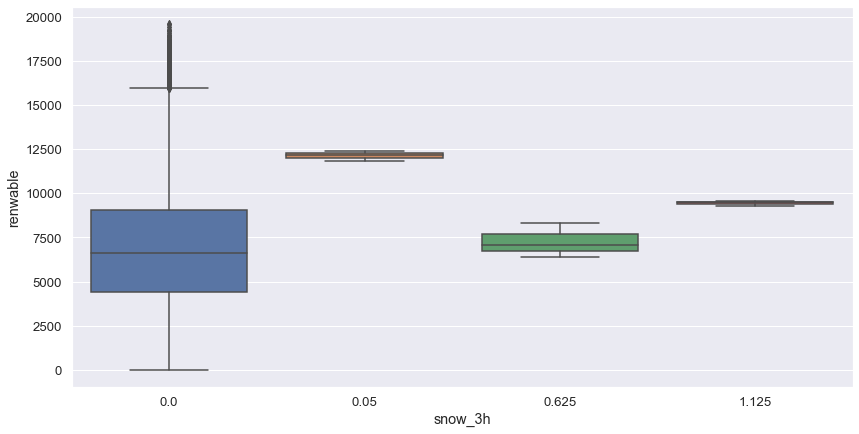

In [28]:
sns.boxplot(data=df,y=df['renwable'],x=df['snow_3h'])

In [29]:
def rain (rain):
    if rain <1 :
        return 0
    else :
        return 1    

In [30]:
df['rain']=df['rain'].apply(rain)

In [31]:
df.rain.value_counts()

0    34920
1      144
Name: rain, dtype: int64

<AxesSubplot:xlabel='rain', ylabel='price actual'>

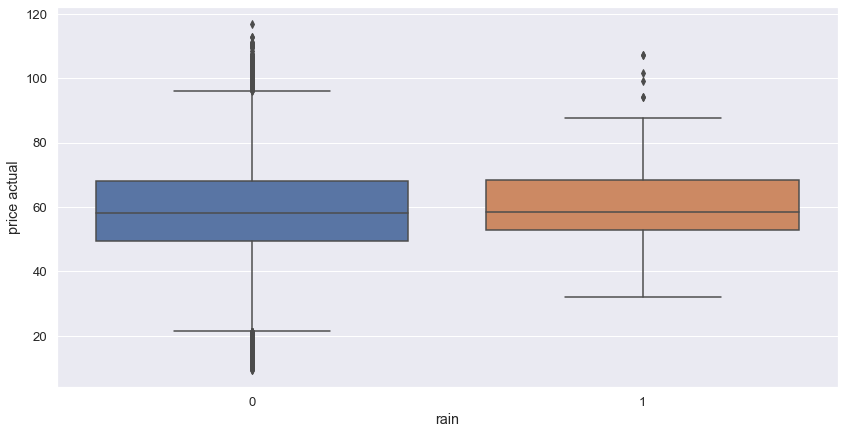

In [32]:
sns.boxplot(data=df,y=df['price actual'],x=df['rain'])

the relation between time and consumbtion to predict the consumbtion in the future 
also between time and price 

In [33]:
load_sum=df.groupby(['year'])['total load actual'].sum()
load_sum

year
2014        25385.0
2015    248074056.0
2016    251090142.0
2017    253193358.0
2018    252954880.0
Name: total load actual, dtype: float64

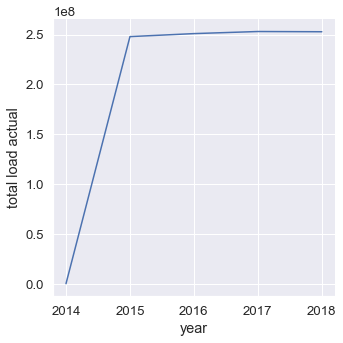

In [34]:
sns.relplot(data=load_sum ,kind='line')

In [35]:
df.drop(df.index[0:1],inplace=True)

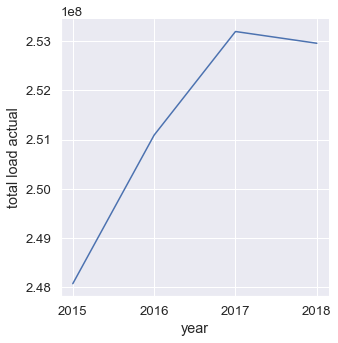

In [36]:
load_sum=df.groupby(['year'])['total load actual'].sum()
sns.relplot(data=load_sum, kind='line')

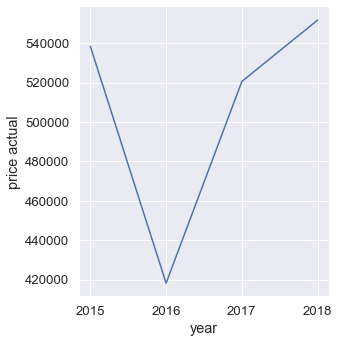

In [37]:
price_sum=df.groupby(['year'])['price actual'].sum()
sns.relplot(data=price_sum,kind='line')

In [38]:
df.head()

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation waste,total load forecast,total load actual,price day ahead,price actual,temp,pressure,humidity,wind_speed,snow_3h,rain,year,month,hour,renwable,season,time
1,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,195.0,24934,24382.0,48.10,64.92,270.475,1001,77,1,0.0,0,2015,1,0,6011.0,Spring,night
2,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,196.0,23515,22734.0,47.33,64.48,269.686,1002,78,0,0.0,0,2015,1,1,5584.0,Spring,night
3,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,191.0,22642,21286.0,42.27,59.32,269.686,1002,78,0,0.0,0,2015,1,2,5363.0,Spring,night
4,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,189.0,21785,20264.0,38.41,56.04,269.686,1002,78,0,0.0,0,2015,1,3,5051.0,Spring,night
5,410.0,178.0,4038.0,3590.0,156.0,2109.0,952.0,743.0,7098.0,43.0,188.0,21441,19905.0,35.72,53.63,270.292,1004,71,2,0.0,0,2015,1,4,4726.0,Spring,night


realation between weather /season and total renwable 

<AxesSubplot:xlabel='season', ylabel='renwable'>

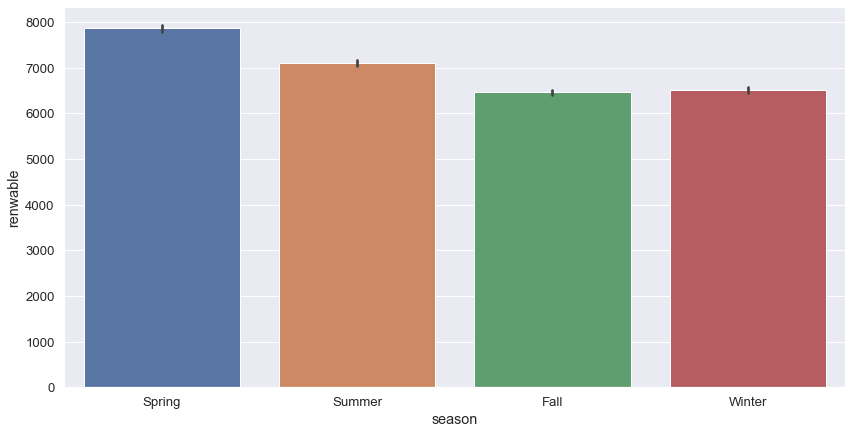

In [39]:
sns.barplot(data=df, x= 'season',y='renwable')

relation between years and power source type (العلاقه بتظهر اى نوع من المصادر اللى بتزيد مع الوقت )

<AxesSubplot:xlabel='year', ylabel='generation biomass'>

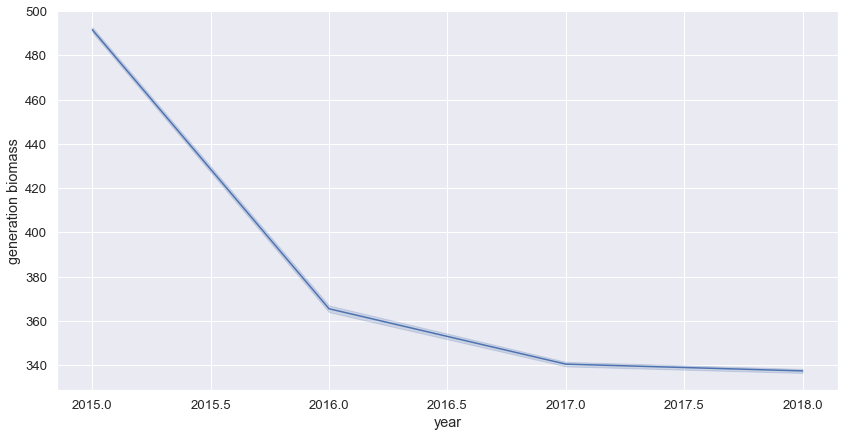

In [40]:
sns.lineplot(data=df,x='year',y='generation biomass')

<AxesSubplot:xlabel='year', ylabel='renwable'>

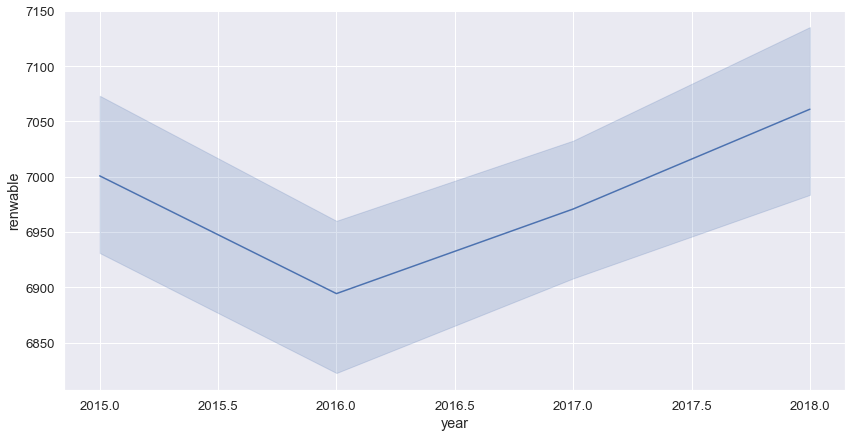

In [41]:
sns.lineplot(data=df,x='year',y='renwable')

In [42]:
df.drop(columns=['month','hour','price day ahead'],inplace=True)

In [43]:
df.head()

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation waste,total load forecast,total load actual,price actual,temp,pressure,humidity,wind_speed,snow_3h,rain,year,renwable,season,time
1,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,195.0,24934,24382.0,64.92,270.475,1001,77,1,0.0,0,2015,6011.0,Spring,night
2,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,196.0,23515,22734.0,64.48,269.686,1002,78,0,0.0,0,2015,5584.0,Spring,night
3,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,191.0,22642,21286.0,59.32,269.686,1002,78,0,0.0,0,2015,5363.0,Spring,night
4,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,189.0,21785,20264.0,56.04,269.686,1002,78,0,0.0,0,2015,5051.0,Spring,night
5,410.0,178.0,4038.0,3590.0,156.0,2109.0,952.0,743.0,7098.0,43.0,188.0,21441,19905.0,53.63,270.292,1004,71,2,0.0,0,2015,4726.0,Spring,night


In [44]:
###fig, ax = plt.subplots(4, 4, figsize=(15, 15))

#features = [
    #['generation biomass', 'generation fossil brown coal/lignite', 'generation fossil gas', 'generation fossil hard coal'],
    #['generation fossil oil', 'generation hydro pumped storage consumption', 'generation hydro run-of-river and poundage'],
    #['generation hydro water reservoir','generation nuclear','generation other','generation waste','total load forecast'],
    #['total load actual','price actual','renwable']
    #]

#for i in range(4):
    #for j in range(4):
        #col = features[i][j]
        #sns.countplot(data=df, x='year', ax=ax[i][j])

<AxesSubplot:>

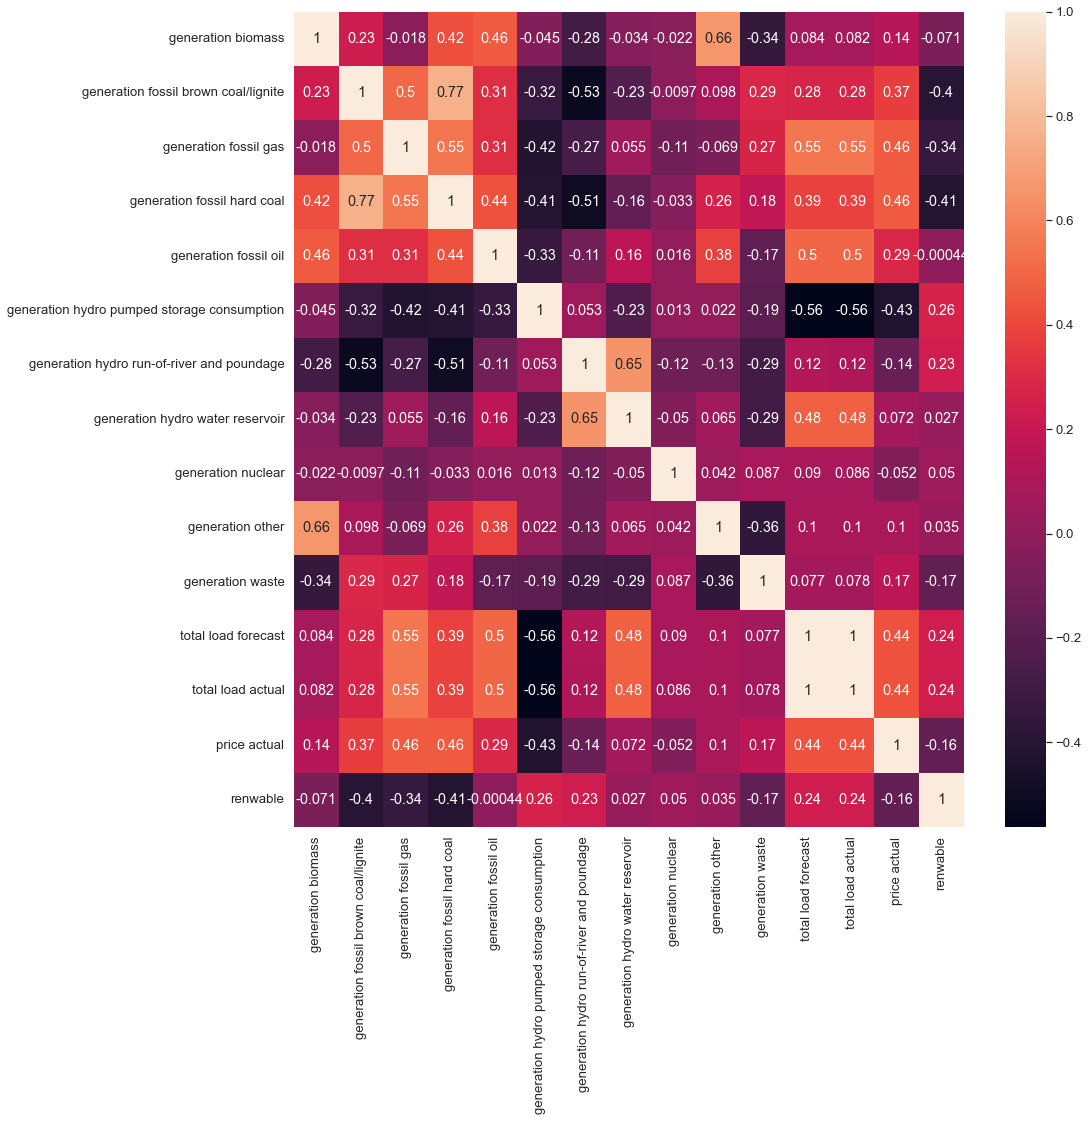

In [45]:
features = [\
    'generation biomass', 'generation fossil brown coal/lignite', 'generation fossil gas', 'generation fossil hard coal',\
    'generation fossil oil', 'generation hydro pumped storage consumption', 'generation hydro run-of-river and poundage',\
    'generation hydro water reservoir','generation nuclear','generation other','generation waste','total load forecast',\
    'total load actual','price actual','renwable','season','time']
    
corr = df[features].corr()

plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True)


split data 

In [46]:
df['total load actual']=df['total load actual'].fillna(df['total load actual'].mean())

In [47]:
x=df.drop('price actual', axis=1)
y=df['price actual']

In [48]:

x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=.25,random_state=42)
x_train.head()


,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation waste,total load forecast,total load actual,temp,pressure,humidity,wind_speed,snow_3h,rain,year,renwable,season,time
18497,353.0,190.0,4258.0,2584.0,239.0,560.0,733.0,838.0,5972.0,55.0,327.0,24500,24606.0,294.150,1017,40,6,0.0,0,2017,10263.0,Spring,day
30435,343.0,0.0,5002.0,2236.0,270.0,0.0,1699.0,5615.0,5038.0,68.0,282.0,34708,34653.0,301.150,1021,45,2,0.0,0,2018,9637.0,Summer,day
8097,540.0,623.0,5824.0,4475.0,329.0,55.0,1625.0,4723.0,7084.0,82.0,159.0,29205,29940.0,284.239,1030,84,1,0.0,0,2015,6464.0,Winter,night
10481,361.0,607.0,6156.0,5954.0,250.0,1150.0,693.0,792.0,5061.0,55.0,299.0,23947,24031.0,279.340,1021,70,3,0.0,0,2016,1999.0,Spring,night
11374,202.0,0.0,3291.0,1045.0,206.0,1015.0,1827.0,5857.0,7099.0,54.0,259.0,21206,21530.0,288.040,1016,45,2,0.0,0,2016,2623.0,Summer,night


In [49]:
x_train['generation biomass']=x_train['generation biomass'].fillna(x_train['generation biomass'].mean())

C:\Users\mohamed\AppData\Local\Temp/ipykernel_19464/1395197209.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['generation biomass']=x_train['generation biomass'].fillna(x_train['generation biomass'].mean())


In [50]:
x_train['generation hydro water reservoir']=x_train['generation hydro water reservoir'].fillna(x_train['generation hydro water reservoir'].mean())
x_train['generation fossil brown coal/lignite']=x_train['generation fossil brown coal/lignite'].fillna(x_train['generation fossil brown coal/lignite'].mean())
x_train['generation fossil gas']=x_train['generation fossil gas'].fillna(x_train['generation fossil gas'].mean())
x_train['generation fossil hard coal']=x_train['generation fossil hard coal'].fillna(x_train['generation fossil hard coal'].mean())
x_train['generation fossil oil']=x_train['generation fossil oil'].fillna(x_train['generation fossil oil'].mean())
x_train['generation hydro pumped storage consumptiongeneration biomass']=x_train['generation hydro pumped storage consumption'].fillna(x_train['generation hydro pumped storage consumption'].mean())
x_train['generation hydro run-of-river and poundage']=x_train['generation hydro run-of-river and poundage'].fillna(x_train['generation hydro run-of-river and poundage'].mean())
x_train['generation nuclear']=x_train['generation nuclear'].fillna(x_train['generation nuclear'].mean())
x_train['generation other']=x_train['generation other'].fillna(x_train['generation other'].mean())
x_train['total load actual']=x_train['total load actual'].fillna(x_train['total load actual'].mean())
x_train['generation waste']=x_train['generation waste'].fillna(x_train['generation waste'].mean())
x_train['renwable']=x_train['renwable'].fillna(x_train['renwable'].mean())
x_train['generation hydro pumped storage consumption']=x_train['generation hydro pumped storage consumption'].fillna(x_train['generation hydro pumped storage consumption'].mean())

C:\Users\mohamed\AppData\Local\Temp/ipykernel_19464/2345921482.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['generation hydro water reservoir']=x_train['generation hydro water reservoir'].fillna(x_train['generation hydro water reservoir'].mean())
C:\Users\mohamed\AppData\Local\Temp/ipykernel_19464/2345921482.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['generation fossil brown coal/lignite']=x_train['generation fossil brown coal/lignite'].fillna(x_train['generation fossil brown

In [51]:
x_train.head()

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation waste,total load forecast,total load actual,temp,pressure,humidity,wind_speed,snow_3h,rain,year,renwable,season,time,generation hydro pumped storage consumptiongeneration biomass
18497,353.0,190.0,4258.0,2584.0,239.0,560.0,733.0,838.0,5972.0,55.0,327.0,24500,24606.0,294.150,1017,40,6,0.0,0,2017,10263.0,Spring,day,560.0
30435,343.0,0.0,5002.0,2236.0,270.0,0.0,1699.0,5615.0,5038.0,68.0,282.0,34708,34653.0,301.150,1021,45,2,0.0,0,2018,9637.0,Summer,day,0.0
8097,540.0,623.0,5824.0,4475.0,329.0,55.0,1625.0,4723.0,7084.0,82.0,159.0,29205,29940.0,284.239,1030,84,1,0.0,0,2015,6464.0,Winter,night,55.0
10481,361.0,607.0,6156.0,5954.0,250.0,1150.0,693.0,792.0,5061.0,55.0,299.0,23947,24031.0,279.340,1021,70,3,0.0,0,2016,1999.0,Spring,night,1150.0
11374,202.0,0.0,3291.0,1045.0,206.0,1015.0,1827.0,5857.0,7099.0,54.0,259.0,21206,21530.0,288.040,1016,45,2,0.0,0,2016,2623.0,Summer,night,1015.0


In [52]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26297 entries, 18497 to 15796
Data columns (total 24 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   generation biomass                                             26297 non-null  float64
 1   generation fossil brown coal/lignite                           26297 non-null  float64
 2   generation fossil gas                                          26297 non-null  float64
 3   generation fossil hard coal                                    26297 non-null  float64
 4   generation fossil oil                                          26297 non-null  float64
 5   generation hydro pumped storage consumption                    26297 non-null  float64
 6   generation hydro run-of-river and poundage                     26297 non-null  float64
 7   generation hydro water reservoir                      

In [53]:
#x_train=pd.DataFrame(pd.get_dummies(x_train,columns=['season'],drop_first=True))

In [54]:
x_train.head()

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation waste,total load forecast,total load actual,temp,pressure,humidity,wind_speed,snow_3h,rain,year,renwable,season,time,generation hydro pumped storage consumptiongeneration biomass
18497,353.0,190.0,4258.0,2584.0,239.0,560.0,733.0,838.0,5972.0,55.0,327.0,24500,24606.0,294.150,1017,40,6,0.0,0,2017,10263.0,Spring,day,560.0
30435,343.0,0.0,5002.0,2236.0,270.0,0.0,1699.0,5615.0,5038.0,68.0,282.0,34708,34653.0,301.150,1021,45,2,0.0,0,2018,9637.0,Summer,day,0.0
8097,540.0,623.0,5824.0,4475.0,329.0,55.0,1625.0,4723.0,7084.0,82.0,159.0,29205,29940.0,284.239,1030,84,1,0.0,0,2015,6464.0,Winter,night,55.0
10481,361.0,607.0,6156.0,5954.0,250.0,1150.0,693.0,792.0,5061.0,55.0,299.0,23947,24031.0,279.340,1021,70,3,0.0,0,2016,1999.0,Spring,night,1150.0
11374,202.0,0.0,3291.0,1045.0,206.0,1015.0,1827.0,5857.0,7099.0,54.0,259.0,21206,21530.0,288.040,1016,45,2,0.0,0,2016,2623.0,Summer,night,1015.0


In [55]:
seasoon={
    'Spring':1,
    'Summer':2,
    'Winter':3,
    'Fall':4
}

In [56]:
dayy={
    'night':0,
    'day':1
}

In [57]:
x_train['season']=x_train['season'].map(seasoon)

C:\Users\mohamed\AppData\Local\Temp/ipykernel_19464/752684535.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['season']=x_train['season'].map(seasoon)


In [58]:

x_train['time']=x_train['time'].map(dayy)

C:\Users\mohamed\AppData\Local\Temp/ipykernel_19464/1198636883.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['time']=x_train['time'].map(dayy)


In [59]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26297 entries, 18497 to 15796
Data columns (total 24 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   generation biomass                                             26297 non-null  float64
 1   generation fossil brown coal/lignite                           26297 non-null  float64
 2   generation fossil gas                                          26297 non-null  float64
 3   generation fossil hard coal                                    26297 non-null  float64
 4   generation fossil oil                                          26297 non-null  float64
 5   generation hydro pumped storage consumption                    26297 non-null  float64
 6   generation hydro run-of-river and poundage                     26297 non-null  float64
 7   generation hydro water reservoir                      

### Handel Test Data

In [60]:
x_test['season']=x_test['season'].map(seasoon)
x_test['time']=x_test['time'].map(dayy)
#x_test=pd.DataFrame(pd.get_dummies(x_test,columns=['season'],drop_first=True))

x_test['generation hydro water reservoir']=x_test['generation hydro water reservoir'].fillna(x_test['generation hydro water reservoir'].mean())
x_test['generation fossil brown coal/lignite']=x_test['generation fossil brown coal/lignite'].fillna(x_test['generation fossil brown coal/lignite'].mean())
x_test['generation fossil gas']=x_test['generation fossil gas'].fillna(x_test['generation fossil gas'].mean())
x_test['generation fossil hard coal']=x_test['generation fossil hard coal'].fillna(x_test['generation fossil hard coal'].mean())
x_test['generation fossil oil']=x_test['generation fossil oil'].fillna(x_test['generation fossil oil'].mean())
x_test['generation hydro pumped storage consumptiongeneration biomass']=x_test['generation hydro pumped storage consumption'].fillna(x_test['generation hydro pumped storage consumption'].mean())
x_test['generation hydro run-of-river and poundage']=x_test['generation hydro run-of-river and poundage'].fillna(x_test['generation hydro run-of-river and poundage'].mean())
x_test['generation nuclear']=x_test['generation nuclear'].fillna(x_test['generation nuclear'].mean())
x_test['generation other']=x_test['generation other'].fillna(x_test['generation other'].mean())
x_test['total load actual']=x_test['total load actual'].fillna(x_test['total load actual'].mean())
x_test['generation waste']=x_test['generation waste'].fillna(x_test['generation waste'].mean())
x_test['renwable']=x_test['renwable'].fillna(x_test['renwable'].mean())
x_test['generation hydro pumped storage consumption']=x_test['generation hydro pumped storage consumption'].fillna(x_test['generation hydro pumped storage consumption'].mean())
x_test['generation biomass']=x_test['generation biomass'].fillna(x_test['generation biomass'].mean())

C:\Users\mohamed\AppData\Local\Temp/ipykernel_19464/691411153.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['season']=x_test['season'].map(seasoon)
C:\Users\mohamed\AppData\Local\Temp/ipykernel_19464/691411153.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['time']=x_test['time'].map(dayy)
C:\Users\mohamed\AppData\Local\Temp/ipykernel_19464/691411153.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [61]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8766 entries, 6071 to 8140
Data columns (total 24 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   generation biomass                                             8766 non-null   float64
 1   generation fossil brown coal/lignite                           8766 non-null   float64
 2   generation fossil gas                                          8766 non-null   float64
 3   generation fossil hard coal                                    8766 non-null   float64
 4   generation fossil oil                                          8766 non-null   float64
 5   generation hydro pumped storage consumption                    8766 non-null   float64
 6   generation hydro run-of-river and poundage                     8766 non-null   float64
 7   generation hydro water reservoir                         

* Model 

<AxesSubplot:xlabel='price actual', ylabel='Count'>

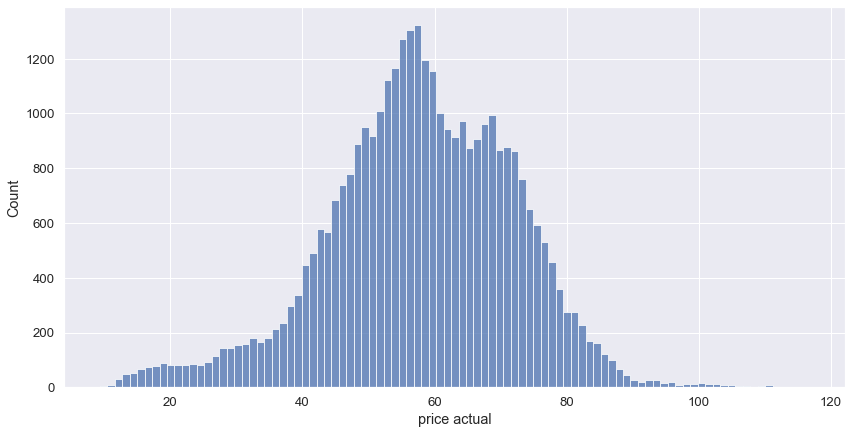

In [62]:
#to distrbution on target values 
sns.histplot(df,x='price actual')

In [63]:
correlation = df.corr(method='pearson')
print(correlation['price actual'].sort_values(ascending=False).to_string())

price actual                                   1.000000
generation fossil gas                          0.462294
generation fossil hard coal                    0.462254
total load forecast                            0.436958
total load actual                              0.436593
generation fossil brown coal/lignite           0.365890
generation fossil oil                          0.286105
generation waste                               0.169117
generation biomass                             0.144071
year                                           0.142103
generation other                               0.100923
temp                                           0.092073
humidity                                       0.078928
generation hydro water reservoir               0.071829
pressure                                       0.046646
rain                                           0.011966
snow_3h                                        0.007470
generation nuclear                            -0

In [64]:
model_lr=LinearRegression()
model_lr.fit(x_train,y_train)
print(model_lr.score(x_test,y_test))
print( mean_absolute_error(y_train,model_lr.predict(x_train)))

0.4268087432166229
8.135408739596992


In [65]:
correlation = df.corr(method='pearson')
print(correlation['price actual'].sort_values(ascending=False).to_string())

price actual                                   1.000000
generation fossil gas                          0.462294
generation fossil hard coal                    0.462254
total load forecast                            0.436958
total load actual                              0.436593
generation fossil brown coal/lignite           0.365890
generation fossil oil                          0.286105
generation waste                               0.169117
generation biomass                             0.144071
year                                           0.142103
generation other                               0.100923
temp                                           0.092073
humidity                                       0.078928
generation hydro water reservoir               0.071829
pressure                                       0.046646
rain                                           0.011966
snow_3h                                        0.007470
generation nuclear                            -0

In [66]:
def check_metrics(model):
    print(model)
    
    print('Training MAE:', mean_absolute_error(y_train,model.predict(x_train)))
    print('-------------------------------------------------------------------')
    print('Validation MAE:', mean_absolute_error(y_test,model.predict(x_test)))
    print('-------------------------------------------------------------------')
    print('Validation R2 score:', model.score(x_test,y_test))
    print('===================================================================')
model = [model_lr]
for m in model:
  check_metrics(m)

LinearRegression()
Training MAE: 8.135408739596992
-------------------------------------------------------------------
Validation MAE: 8.069223395143734
-------------------------------------------------------------------
Validation R2 score: 0.4268087432166229


In [67]:
#Trying Different Model to get best result 
model_rfr = RandomForestRegressor()
model_xgr=XGBRegressor()
model_svr=SVR()
model_knr=neighbors.KNeighborsRegressor(n_neighbors=7)

# Fitting models
model_rfr.fit(x_train,y_train)
model_xgr.fit(x_train,y_train)
model_svr.fit(x_train,y_train)
model_knr.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=7)

In [75]:
model = [model_lr,model_rfr,model_xgr,model_svr,model_knr]
def check_metrics(model):
    print(model)
    print('----------------------')
    print('Training MAE:', mean_absolute_error(y_train,model.predict(x_train)))
    print('Validation MAE:', mean_absolute_error(y_test,model.predict(x_test)))
    print('Validation R2 score:', model.score(x_test,y_test))
    print('===================================================================')

for m in model:
  check_metrics(m)

LinearRegression()
----------------------
Training MAE: 8.135408739596992
Validation MAE: 8.069223395143734
Validation R2 score: 0.4268087432166229
RandomForestRegressor()
----------------------
Training MAE: 1.1141934555272464
Validation MAE: 2.9558744581336986
Validation R2 score: 0.902445675353667
XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0,

# The best model is Random Forest
## Make Hyper tuning to enhance the result 

In [69]:
prameters = {'max_depth':range(5,30,5),
              'n_estimators':range(100,150,10),
              'min_samples_split':np.arange(2,5,1)}

In [70]:
grid_r=GridSearchCV(estimator=model_rfr,param_grid=prameters,cv=5)
grid_r.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': range(5, 30, 5),
                         'min_samples_split': array([2, 3, 4]),
                         'n_estimators': range(100, 150, 10)})

In [71]:
grid_r.estimator.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [72]:
grid_r.best_params_

{'max_depth': 25, 'min_samples_split': 2, 'n_estimators': 130}

In [73]:
model_rfr2 = RandomForestRegressor(max_depth= 25 ,n_estimators= 140, min_samples_split = 2)
model_rfr2.fit(x_train,y_train)
print(model_rfr2)
print('----------------------')
print('Training MAE:', mean_absolute_error(y_train,model_rfr2.predict(x_train)))
print('Validation MAE:', mean_absolute_error(y_test,model_rfr2.predict(x_test)))
print('Validation R2 score:', model_rfr2.score(x_test,y_test))

RandomForestRegressor(max_depth=25, n_estimators=140)
----------------------
Training MAE: 1.1151884339506377
Validation MAE: 2.9451332098369485
Validation R2 score: 0.9034700051286738


This the Best Result ^_^ ,Thanks Epsilon 

In [74]:
joblib.dump(model_rfr2,'predict_power_price.h5')

['predict_power_price.h5']